##### Packages

In [192]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [193]:
# Load data
fileLtd = "database/ESGinfo_TimeSeries.csv"
fileTESG = "database/ESG_TESG.csv"
fileTESGscore = "database/111_TESG永續發展指標主表.xlsx"
df_Ltd = pd.read_csv(fileLtd, encoding='big5')
df_TESG = pd.read_csv(fileTESG)
df_TESGscore = pd.read_excel(fileTESGscore)

#### Mapping | 公開資訊觀測站

In [194]:
df = pd.DataFrame()
new_company = [2432, 3715, 6854, 6830, 6834, 6835, 6658, 6916, 911622, 9103, 9105, 6805, 6933, 6807, 9110, 6937, 4771, 9136, 6861, 2645, 6742, 4569, 3168, 4588, 910322, 911868, 6526]
if not df_Ltd[['industry_id']].empty:
    df = df_Ltd[~df_Ltd['代號'].isin(new_company)]
    df = df[['代號', 'industry_id']].dropna(subset=['industry_id']).copy().astype(int)
    df_Ltd = df_Ltd.drop(df_Ltd[df_Ltd['代號'].isin(new_company)].index)

##### E

In [195]:
# (Q4)請問，貴公司針對辦公室或廠區，是否有降低溫室氣體排放量？ 
# (Q5)請問，貴公司是否有設定目標減少產品製程溫室氣體排放？ 
# (Q6)請問，貴公司是否有設定目標減少交通工具溫室氣體排放？
# 都是範疇一的溫室氣體排放
def assign_q4(df_Ltd, df):
    """Assigns values to the 'Q4' column of df based on conditions in df_Ltd['scope1_ton_CO2e_YoY'].

    Args:
        df_Ltd (pd.DataFrame): The DataFrame containing the 'scope1_ton_CO2e_YoY' column.
        df (pd.DataFrame): The DataFrame where the 'Q4' column will be assigned values.
    """

    # Use numpy.where for conditional assignment based on multiple conditions
    conditions = [df_Ltd['scope1_ton_CO2e_YoY'] < -10, 
                df_Ltd['scope1_ton_CO2e_YoY'] > 10,
                (-10 <= df_Ltd['scope1_ton_CO2e_YoY']) & (df_Ltd['scope1_ton_CO2e_YoY'] <= 10),
                df_Ltd['scope1_ton_CO2e_YoY'].isna()]
    values = np.array([2, 0.5, 1, 0])

    if not df.empty:
        df['Q4'] = np.select(conditions, values, np.nan).astype(int)
    else:
        pass
    return df

df = assign_q4(df_Ltd.dropna(subset=['industry_id']).copy(), df)
print(df)


       代號  industry_id  Q4
0    1101           14   2
1    1102           14   1
2    1103           14   0
3    1104           14   0
4    1108           14   1
..    ...          ...  ..
711  9938            3   0
712  9939           15   0
713  9942           22   0
714  9944            3   0
715  9958           16   0

[709 rows x 3 columns]


In [196]:
# 請問，貴公司針對辦公室或廠區，是否有降低總用水量？

def assign_q7(df_Ltd, df):
    """Assigns values to the 'Q7' column of df based on conditions in df_Ltd['water_usage_ton_YoY'].

    Args:
        df_Ltd (pd.DataFrame): The DataFrame containing the 'water_usage_ton_YoY' column.
        df (pd.DataFrame): The DataFrame where the 'Q7' column will be assigned values.
    """

    # Use numpy.where for conditional assignment based on multiple conditions
    conditions = [df_Ltd['water_usage_ton_YoY'] < -3, 
                df_Ltd['water_usage_ton_YoY'] > 3,
                (-3 <= df_Ltd['water_usage_ton_YoY']) & (df_Ltd['water_usage_ton_YoY'] <= 3),
                df_Ltd['water_usage_ton_YoY'].isna()]
    values = np.array([2, 0.5, 1, 0])

    if not df.empty:
        df['Q7'] = np.select(conditions, values, np.nan).astype(int)
    else:
        pass
    return df

df = assign_q7(df_Ltd.dropna(subset=['industry_id']).copy(), df)
print(df)


       代號  industry_id  Q4  Q7
0    1101           14   2   2
1    1102           14   1   2
2    1103           14   0   0
3    1104           14   0   0
4    1108           14   1   1
..    ...          ...  ..  ..
711  9938            3   0   0
712  9939           15   0   0
713  9942           22   0   0
714  9944            3   0   0
715  9958           16   0   0

[709 rows x 4 columns]


In [197]:
df_Ltd['intensity_trash_YoY'].describe()

c:\Users\mayda\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    416.000000
mean            inf
std             NaN
min     -100.000000
25%      -92.448513
50%       25.126263
75%             NaN
max             inf
Name: intensity_trash_YoY, dtype: float64

In [198]:
# 請問，貴公司針對辦公室或廠區，是否有提升可回收或降低不可回收廢棄物製造量？

def assign_q11(df_Ltd, df):
    """Assigns values to the 'Q11' column of df based on conditions in df_Ltd['intensity_trash_YoY'].

    Args:
        df_Ltd (pd.DataFrame): The DataFrame containing the 'intensity_trash_YoY' column.
        df (pd.DataFrame): The DataFrame where the 'Q11' column will be assigned values.
    """

    # Use numpy.where for conditional assignment based on multiple conditions
    conditions = [df_Ltd['intensity_trash_YoY'] < -5, 
                df_Ltd['intensity_trash_YoY'] > 5,
                (-5 <= df_Ltd['intensity_trash_YoY']) & (df_Ltd['intensity_trash_YoY'] <= 5),
                df_Ltd['intensity_trash_YoY'].isna()]
    values = np.array([2, 0.5, 1, 0])

    if not df.empty:
        df['Q11'] = np.select(conditions, values, np.nan).astype(int)
    else:
        pass
    return df

df = assign_q11(df_Ltd.dropna(subset=['industry_id']).copy(), df)
print(df)


       代號  industry_id  Q4  Q7  Q11
0    1101           14   2   2    0
1    1102           14   1   2    0
2    1103           14   0   0    0
3    1104           14   0   0    0
4    1108           14   1   1    0
..    ...          ...  ..  ..  ...
711  9938            3   0   0    0
712  9939           15   0   0    0
713  9942           22   0   0    0
714  9944            3   0   0    0
715  9958           16   0   0    0

[709 rows x 5 columns]


In [199]:
# (Q15)請問，貴公司針對供應鏈廠商之總溫室氣體排放，是否有進行管理或要求其減少？
# (Q16)請問，貴公司針對供應鏈廠商之總能源消耗，是否有進行管理或要求其減少？

def assign_q15(df_Ltd, df):
    """Assigns values to the 'Q15' column of df based on conditions in df_Ltd['scope3_ton_CO2e_YoY'].

    Args:
        df_Ltd (pd.DataFrame): The DataFrame containing the 'scope3_ton_CO2e_YoY' column.
        df (pd.DataFrame): The DataFrame where the 'Q15' column will be assigned values.
    """

    # Use numpy.where for conditional assignment based on multiple conditions
    conditions = [df_Ltd['scope3_ton_CO2e_YoY'] < -5 | df_Ltd['scope3_ton_CO2e_YoY'].isin([np.inf, -np.inf]), 
                df_Ltd['scope3_ton_CO2e_YoY'] > 5 & df_Ltd['scope3_ton_CO2e_YoY'].isin([50000, 5]),
                (-5 <= df_Ltd['scope3_ton_CO2e_YoY']),
                df_Ltd['scope3_ton_CO2e_YoY'].isna()]
    values = np.array([2, 0.5, 1, 0])

    if not df.empty:
        df['Q15'] = np.select(conditions, values, np.nan).astype(int)
    else:
        pass
    return df

df = assign_q15(df_Ltd.dropna(subset=['industry_id']).copy(), df)
print(df)


       代號  industry_id  Q4  Q7  Q11  Q15
0    1101           14   2   2    0    2
1    1102           14   1   2    0    2
2    1103           14   0   0    0    0
3    1104           14   0   0    0    0
4    1108           14   1   1    0    0
..    ...          ...  ..  ..  ...  ...
711  9938            3   0   0    0    0
712  9939           15   0   0    0    0
713  9942           22   0   0    0    0
714  9944            3   0   0    0    0
715  9958           16   0   0    0    0

[709 rows x 6 columns]


##### S

In [200]:
# 請問，貴公司是否有採取相關措施，以預防失誤事件(如人為造成的工安事故、廠房公共安全、災害造成的人員傷亡等)發生？   

def assign_q20(df_Ltd, df):
    """Assigns values to the 'Q20' column of df based on conditions in df_Ltd['oa_num_YoY'].

    Args:
        df_Ltd (pd.DataFrame): The DataFrame containing the 'oa_num_YoY' column.
        df (pd.DataFrame): The DataFrame where the 'Q20' column will be assigned values.
    """

    # Use numpy.where for conditional assignment based on multiple conditions
    conditions = [df_Ltd['oa_num_YoY'] < -50, 
                df_Ltd['oa_num_YoY'] > 50,
                (-50 <= df_Ltd['oa_num_YoY']) & (df_Ltd['oa_num_YoY'] <= 50),
                df_Ltd['oa_num_YoY'].isna()]
    values = np.array([2, 0.5, 1, 0])

    if not df.empty:
        df['Q20'] = np.select(conditions, values, np.nan).astype(int)
    else:
        pass
    return df

df = assign_q20(df_Ltd.dropna(subset=['industry_id']).copy(), df)
print(df)


       代號  industry_id  Q4  Q7  Q11  Q15  Q20
0    1101           14   2   2    0    2    0
1    1102           14   1   2    0    2    0
2    1103           14   0   0    0    0    0
3    1104           14   0   0    0    0    0
4    1108           14   1   1    0    0    1
..    ...          ...  ..  ..  ...  ...  ...
711  9938            3   0   0    0    0    0
712  9939           15   0   0    0    0    0
713  9942           22   0   0    0    0    0
714  9944            3   0   0    0    0    0
715  9958           16   0   0    0    0    0

[709 rows x 7 columns]


##### G

In [201]:
# 請問，貴公司董事會結構的獨立董事比率是否有提高？  

def assign_q34_2(df_Ltd, df):
    """Assigns values to the 'Qq34_2' column of df based on conditions in df_Ltd['id_ratio_YoY'].

    Args:
        df_Ltd (pd.DataFrame): The DataFrame containing the 'oa_num_YoY' column.
        df (pd.DataFrame): The DataFrame where the 'Q20' column will be assigned values.
    """

    # Use numpy.where for conditional assignment based on multiple conditions
    conditions = [df_Ltd['oa_num_YoY'] < 0, 
                df_Ltd['oa_num_YoY'] > 10,
                (0 <= df_Ltd['oa_num_YoY']) & (df_Ltd['oa_num_YoY'] <= 10),
                df_Ltd['oa_num_YoY'].isna()]
    values = np.array([1, 4, 3, 1])

    if not df.empty:
        df['Q34_2'] = np.select(conditions, values, np.nan).astype(int)
    else:
        pass
    return df

df = assign_q34_2(df_Ltd.dropna(subset=['industry_id']).copy(), df)
print(df)


       代號  industry_id  Q4  Q7  Q11  Q15  Q20  Q34_2
0    1101           14   2   2    0    2    0      4
1    1102           14   1   2    0    2    0      1
2    1103           14   0   0    0    0    0      1
3    1104           14   0   0    0    0    0      4
4    1108           14   1   1    0    0    1      1
..    ...          ...  ..  ..  ...  ...  ...    ...
711  9938            3   0   0    0    0    0      1
712  9939           15   0   0    0    0    0      1
713  9942           22   0   0    0    0    0      1
714  9944            3   0   0    0    0    0      1
715  9958           16   0   0    0    0    0      1

[709 rows x 8 columns]


#### Mapping | TESG

In [202]:
dfT = pd.DataFrame()
nodata_company = [3168, 6658, 6805, 6742, 6916, 911622, 9103, 9105, 6805, 6933, 6807, 9110, 6937, 4771, 9136, 6861, 2645, 6742, 4569, 3168, 4588, 910322, 911868, 6526] # 沒有在公開資訊觀測站上
if not df_TESG[['industry_id']].empty:
    dfT = df_TESG[~df_TESG['代號'].isin(nodata_company)]
    dfT = dfT[['代號', 'industry_id', 'LEVEL_111']].dropna(subset=['industry_id']).copy()
    dfT[['industry_id']].astype(int)
    df_TESG = df_TESG.drop(df_TESG[df_TESG['代號'].isin(nodata_company)].index)


##### 確定Ltd和TESG有共同的上市公司

In [203]:
# Assuming industry_id is unique across DataFrames
unique_ids_Ltd = set(df['代號'])
unique_ids_TESG = set(dfT['代號'])

missing_ids = unique_ids_Ltd.difference(unique_ids_TESG)

# missing_ids will contain the IDs of the 2 missing companies
print(f"Missing company IDs: {missing_ids}")

Missing company IDs: set()


##### E

In [204]:
df_TESG['E1_YoY'].describe()

count     709.000000
mean        8.475750
std       110.022731
min        -0.999705
25%        -0.767586
50%        -0.240803
75%         0.667092
max      2857.450000
Name: E1_YoY, dtype: float64

In [205]:
df_TESG['E1_base_YoY'].describe()

count     706.000000
mean       22.161429
std       159.257987
min        -0.999468
25%        -0.687142
50%        -0.073064
75%         1.326652
max      2946.328571
Name: E1_base_YoY, dtype: float64

In [206]:
# E1_每佰萬單位營收碳排放(噸)

def assign_E1(df_TESG, dfT):
    """Assigns values to the 'E1' column of df based on conditions in df_TESG['E1_YoY'].

    Args:
        df_TESG (pd.DataFrame): The DataFrame containing the 'E1_YoY', 'E1_base_YoY'column.
        dfT (pd.DataFrame): The DataFrame where the 'E1' column will be assigned values.
    """

    # Use numpy.where for conditional assignment based on multiple conditions
    conditions = [(df_TESG['E1_YoY'] < df_TESG['E1_base_YoY']) & (df_TESG['E1_YoY'] - df_TESG['E1_base_YoY'] > 1), # 排放量增加幅度變小
                  (df_TESG['E1_YoY'] > df_TESG['E1_base_YoY']) & (df_TESG['E1_YoY'] - df_TESG['E1_base_YoY'] > 1),
                  ((df_TESG['E1_YoY'] > df_TESG['E1_base_YoY']) & (df_TESG['E1_YoY'] - df_TESG['E1_base_YoY']<= 1)) | (df_TESG['E1_YoY'] < df_TESG['E1_base_YoY']) & (df_TESG['E1_YoY'] - df_TESG['E1_base_YoY'] <= 1),
                  df_TESG['E1_YoY'].isna()]
    values = np.array([2, 0.5, 1, 0])

    if not df.empty:
        dfT['E1'] = np.select(conditions, values, np.nan).astype(int)      
    else:
        pass
    return dfT

dfT = assign_E1(df_TESG.dropna(subset=['industry_id']).copy(), dfT)
print(dfT)


       代號  industry_id LEVEL_111          E1
0    1101           14        B+           1
1    1102           14         A           1
2    1103           14         B           1
3    1104           14        B+           1
4    1108           14         B           0
..    ...          ...       ...         ...
708  9938            3        B+           0
709  9939           15        B+           1
710  9942           22         B -2147483648
711  9944            3        B- -2147483648
712  9958           16         B -2147483648

[709 rows x 4 columns]


<ipython-input-206-462b55309cc4>:19: RuntimeWarning: invalid value encountered in cast
  dfT['E1'] = np.select(conditions, values, np.nan).astype(int)


In [207]:
# E9_每佰萬單位營收用水量(噸)

def assign_E9(df_TESG, dfT):
    """Assigns values to the 'E1' column of df based on conditions in df_TESG['E9_YoY'].

    Args:
        df_TESG (pd.DataFrame): The DataFrame containing the 'E9_YoY' column.
        dfT (pd.DataFrame): The DataFrame where the 'E9' column will be assigned values.
    """

    # Use numpy.where for conditional assignment based on multiple conditions
    conditions = [df_TESG['E9_YoY'] < -0.12, 
                df_TESG['E9_YoY'] > 0.12,
                (-0.12 <= df_TESG['E9_YoY']) & (df_TESG['E9_YoY'] <= 0.12),
                df_TESG['E9_YoY'].isna()]
    values = np.array([2, 0.5, 1, 0])

    if not dfT.empty:
        dfT['E9'] = np.select(conditions, values, np.nan).astype(int)
    else:
        pass
    return dfT

dfT = assign_E9(df_TESG.dropna(subset=['industry_id']).copy(), dfT)
print(dfT)


       代號  industry_id LEVEL_111          E1  E9
0    1101           14        B+           1   2
1    1102           14         A           1   2
2    1103           14         B           1   1
3    1104           14        B+           1   0
4    1108           14         B           0   0
..    ...          ...       ...         ...  ..
708  9938            3        B+           0   0
709  9939           15        B+           1   0
710  9942           22         B -2147483648   0
711  9944            3        B- -2147483648   2
712  9958           16         B -2147483648   2

[709 rows x 5 columns]


In [208]:
df_TESG['E10_YoY'].describe()

c:\Users\mayda\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    99.000000
mean           inf
std            NaN
min      -1.000000
25%      -1.000000
50%      -0.947995
75%            NaN
max            inf
Name: E10_YoY, dtype: float64

In [209]:
# E10_用水回收率%	

def assign_E10(df_TESG, dfT):
    """Assigns values to the 'E10' column of df based on conditions in df_TESG['E10_YoY'].

    Args:
        df_TESG (pd.DataFrame): The DataFrame containing the 'E10_YoY' column.
        dfT (pd.DataFrame): The DataFrame where the 'E10' column will be assigned values.
    """

    # Use numpy.where for conditional assignment based on multiple conditions
    conditions = [df_TESG['E10_YoY'] > 0, 
                df_TESG['E10_YoY'] < -0.5,
                (-0.5 <= df_TESG['E10_YoY']) & (df_TESG['E10_YoY'] <= 0),
                df_TESG['E10_YoY'].isna()]
    values = np.array([2, 0.5, 1, 0])

    if not dfT.empty:
        dfT['E10'] = np.select(conditions, values, np.nan).astype(int)
    else:
        pass
    return dfT

dfT = assign_E10(df_TESG.dropna(subset=['industry_id']).copy(), dfT)
print(dfT)


       代號  industry_id LEVEL_111          E1  E9  E10
0    1101           14        B+           1   2    0
1    1102           14         A           1   2    0
2    1103           14         B           1   1    2
3    1104           14        B+           1   0    0
4    1108           14         B           0   0    0
..    ...          ...       ...         ...  ..  ...
708  9938            3        B+           0   0    0
709  9939           15        B+           1   0    0
710  9942           22         B -2147483648   0    0
711  9944            3        B- -2147483648   2    0
712  9958           16         B -2147483648   2    0

[709 rows x 6 columns]


In [210]:
# E17_負面新聞約當則次(近三年平均)

def assign_E17(df_TESG, dfT):
    """Assigns values to the 'E17' column of df based on conditions in df_TESG['E17_YoY'].

    Args:
        df_TESG (pd.DataFrame): The DataFrame containing the 'E17_YoY' column.
        dfT (pd.DataFrame): The DataFrame where the 'E17' column will be assigned values.
    """

    # Use numpy.where for conditional assignment based on multiple conditions
    conditions = [df_TESG['E17_YoY'] < -0.1, 
                df_TESG['E17_YoY'] > 0,
                (-0.1 <= df_TESG['E17_YoY']) & (df_TESG['E17_YoY'] <= 0),
                df_TESG['E17_YoY'].isna()]
    values = np.array([2, 0.5, 1, 2])

    if not dfT.empty:
        dfT['E17'] = np.select(conditions, values, np.nan).astype(int)
    else:
        pass
    return dfT

dfT = assign_E17(df_TESG.dropna(subset=['industry_id']).copy(), dfT)
print(dfT)


       代號  industry_id LEVEL_111          E1  E9  E10  E17
0    1101           14        B+           1   2    0    2
1    1102           14         A           1   2    0    2
2    1103           14         B           1   1    2    2
3    1104           14        B+           1   0    0    2
4    1108           14         B           0   0    0    2
..    ...          ...       ...         ...  ..  ...  ...
708  9938            3        B+           0   0    0    2
709  9939           15        B+           1   0    0    2
710  9942           22         B -2147483648   0    0    2
711  9944            3        B- -2147483648   2    0    2
712  9958           16         B -2147483648   2    0    2

[709 rows x 7 columns]


In [211]:
dfT = dfT.merge(df[['代號', 'Q4']], how='outer', on='代號')
dfT = dfT.merge(df[['代號', 'Q7']], how='outer', on='代號')
dfT = dfT.merge(df[['代號', 'Q11']], how='outer', on='代號')
dfT = dfT.merge(df[['代號', 'Q15']], how='outer', on='代號')

df_Ltd.rename(columns = {'ISO50001': 'Q3'}, inplace=True)
df['Q3'] = df_Ltd['Q3'].copy()
dfT = dfT.merge(df[['代號', 'Q3']], how='outer', on='代號')

df_Ltd.rename(columns = {'ISO14001': 'Q13'}, inplace=True)
df['Q13'] = df_Ltd['Q13'].copy()
dfT = dfT.merge(df[['代號', 'Q13']], how='outer', on='代號')

df_Ltd.rename(columns = {'conservation': 'Q17'}, inplace=True)
df['Q17'] = df_Ltd['Q17'].copy()
dfT = dfT.merge(df[['代號', 'Q17']], how='outer', on='代號')

##### S

In [212]:
df_TESG['S12_YoY'].describe()

count    709.000000
mean       0.762838
std        3.199964
min       -0.995394
25%       -0.489806
50%       -0.071782
75%        0.764115
max       41.958333
Name: S12_YoY, dtype: float64

In [213]:
# S12_員工流動率%(近三年平均)	

def assign_S12(df_TESG, dfT):
    """Assigns values to the 'S12' column of df based on conditions in df_TESG['S12_YoY'].

    Args:
        df_TESG (pd.DataFrame): The DataFrame containing the 'S12_YoY' column.
        dfT (pd.DataFrame): The DataFrame where the 'S12' column will be assigned values.
    """

    # Use numpy.where for conditional assignment based on multiple conditions
    conditions = [df_TESG['S12_YoY'] < 0, 
                df_TESG['S12_YoY'] > 0.8,
                (0 <= df_TESG['S12_YoY']) & (df_TESG['S12_YoY'] <= 0.8),
                df_TESG['S12_YoY'].isna()]
    values = np.array([2, 0.5, 1, 0])

    if not dfT.empty:
        dfT['S12'] = np.select(conditions, values, np.nan).astype(int)
    else:
        pass
    return dfT

dfT = assign_S12(df_TESG.dropna(subset=['industry_id']).copy(), dfT)
print(dfT)


       代號  industry_id LEVEL_111          E1  E9  E10  E17  Q4  Q7  Q11  Q15  \
0    1101           14        B+           1   2    0    2   2   2    0    2   
1    1102           14         A           1   2    0    2   1   2    0    2   
2    1103           14         B           1   1    2    2   0   0    0    0   
3    1104           14        B+           1   0    0    2   0   0    0    0   
4    1108           14         B           0   0    0    2   1   1    0    0   
..    ...          ...       ...         ...  ..  ...  ...  ..  ..  ...  ...   
704  9938            3        B+           0   0    0    2   0   0    0    0   
705  9939           15        B+           1   0    0    2   0   0    0    0   
706  9942           22         B -2147483648   0    0    2   0   0    0    0   
707  9944            3        B- -2147483648   2    0    2   0   0    0    0   
708  9958           16         B -2147483648   2    0    2   0   0    0    0   

        Q3    Q13  S12  
0        3    

In [214]:
# S2_GRI_人權及社區關係揭露度	

def assign_S2(df_TESG, dfT):
    """Assigns values to the 'S2' column of df based on conditions in df_TESG['S2_YoY'].

    Args:
        df_TESG (pd.DataFrame): The DataFrame containing the 'S2_YoY' column.
        dfT (pd.DataFrame): The DataFrame where the 'S2' column will be assigned values.
    """

    # Use numpy.where for conditional assignment based on multiple conditions
    conditions = [df_TESG['S2_YoY'] > 0, 
                df_TESG['S2_YoY'] < -0.5,
                (-0.5 <= df_TESG['S2_YoY']) & (df_TESG['S2_YoY'] <= 0),
                df_TESG['S2_YoY'].isna()]
    values = np.array([2, 0.5, 1, 0])

    if not dfT.empty:
        dfT['S2'] = np.select(conditions, values, np.nan).astype(int)
    else:
        pass
    return dfT

dfT = assign_S2(df_TESG.dropna(subset=['industry_id']).copy(), dfT)
print(dfT)


       代號  industry_id LEVEL_111          E1  E9  E10  E17  Q4  Q7  Q11  Q15  \
0    1101           14        B+           1   2    0    2   2   2    0    2   
1    1102           14         A           1   2    0    2   1   2    0    2   
2    1103           14         B           1   1    2    2   0   0    0    0   
3    1104           14        B+           1   0    0    2   0   0    0    0   
4    1108           14         B           0   0    0    2   1   1    0    0   
..    ...          ...       ...         ...  ..  ...  ...  ..  ..  ...  ...   
704  9938            3        B+           0   0    0    2   0   0    0    0   
705  9939           15        B+           1   0    0    2   0   0    0    0   
706  9942           22         B -2147483648   0    0    2   0   0    0    0   
707  9944            3        B- -2147483648   2    0    2   0   0    0    0   
708  9958           16         B -2147483648   2    0    2   0   0    0    0   

        Q3    Q13  S12  S2  
0        3

In [215]:
# S9_GRI_產品品質及安全揭露度

def assign_S9(df_TESG, dfT):
    """Assigns values to the 'S9' column of df based on conditions in df_TESG['S9_YoY'].

    Args:
        df_TESG (pd.DataFrame): The DataFrame containing the 'S9_YoY' column.
        dfT (pd.DataFrame): The DataFrame where the 'S9' column will be assigned values.
    """

    # Use numpy.where for conditional assignment based on multiple conditions
    conditions = [df_TESG['S9_YoY'] > 0, 
                df_TESG['S9_YoY'] < -0.5,
                (-0.5 <= df_TESG['S9_YoY']) & (df_TESG['S9_YoY'] <= 0),
                df_TESG['S9_YoY'].isna()]
    values = np.array([2, 0.5, 1, 0])

    if not dfT.empty:
        dfT['S9'] = np.select(conditions, values, np.nan).astype(int)
    else:
        pass
    return dfT

dfT = assign_S9(df_TESG.dropna(subset=['industry_id']).copy(), dfT)
print(dfT)


       代號  industry_id LEVEL_111          E1  E9  E10  E17  Q4  Q7  Q11  Q15  \
0    1101           14        B+           1   2    0    2   2   2    0    2   
1    1102           14         A           1   2    0    2   1   2    0    2   
2    1103           14         B           1   1    2    2   0   0    0    0   
3    1104           14        B+           1   0    0    2   0   0    0    0   
4    1108           14         B           0   0    0    2   1   1    0    0   
..    ...          ...       ...         ...  ..  ...  ...  ..  ..  ...  ...   
704  9938            3        B+           0   0    0    2   0   0    0    0   
705  9939           15        B+           1   0    0    2   0   0    0    0   
706  9942           22         B -2147483648   0    0    2   0   0    0    0   
707  9944            3        B- -2147483648   2    0    2   0   0    0    0   
708  9958           16         B -2147483648   2    0    2   0   0    0    0   

        Q3    Q13  S12  S2  S9  
0     

In [216]:
# S21_失能風險(三年平均)	

def assign_S21(df_TESG, dfT):
    """Assigns values to the 'S21' column of df based on conditions in df_TESG['S21_YoY'].

    Args:
        df_TESG (pd.DataFrame): The DataFrame containing the 'S21_YoY' column.
        dfT (pd.DataFrame): The DataFrame where the 'S21' column will be assigned values.
    """

    # Use numpy.where for conditional assignment based on multiple conditions
    conditions = [(df_TESG['S21_YoY'] < -0.05) & (df_TESG['S21_YoY'] < df_TESG['S21_base_YoY']), 
                df_TESG['S21_YoY'] > df_TESG['S21_base_YoY'],
                ((0 > df_TESG['S21_YoY']) & (df_TESG['S21_YoY'] < -0.05)) | ((df_TESG['S21_YoY'] < -0.05) & (df_TESG['S21_YoY'] >= df_TESG['S21_base_YoY'])),
                df_TESG['S21_YoY'].isna()]
    values = np.array([2, 0.5, 1, 0])

    if not dfT.empty:
        dfT['S21'] = np.select(conditions, values, np.nan).astype(int)
    else:
        pass
    return dfT

dfT = assign_S21(df_TESG.dropna(subset=['industry_id']).copy(), dfT)
print(dfT)


       代號  industry_id LEVEL_111          E1  E9  E10  E17  Q4  Q7  Q11  Q15  \
0    1101           14        B+           1   2    0    2   2   2    0    2   
1    1102           14         A           1   2    0    2   1   2    0    2   
2    1103           14         B           1   1    2    2   0   0    0    0   
3    1104           14        B+           1   0    0    2   0   0    0    0   
4    1108           14         B           0   0    0    2   1   1    0    0   
..    ...          ...       ...         ...  ..  ...  ...  ..  ..  ...  ...   
704  9938            3        B+           0   0    0    2   0   0    0    0   
705  9939           15        B+           1   0    0    2   0   0    0    0   
706  9942           22         B -2147483648   0    0    2   0   0    0    0   
707  9944            3        B- -2147483648   2    0    2   0   0    0    0   
708  9958           16         B -2147483648   2    0    2   0   0    0    0   

        Q3    Q13  S12  S2  S9         

<ipython-input-216-8d6f3672df4a>:19: RuntimeWarning: invalid value encountered in cast
  dfT['S21'] = np.select(conditions, values, np.nan).astype(int)


In [217]:
# 請問，貴公司是否支持ESG產品及進行ESG揭露?

def assign_esg_disclosure(df_TESG, dfT):
    # Use numpy.where for conditional assignment based on multiple conditions
    conditions = [(df_TESG['採用永續報告書年度'] != "") & (df_TESG['採用永續報告書是否驗證'] == 1), 
                  (df_TESG['採用永續報告書年度'] != "") & (df_TESG['採用永續報告書是否驗證'] == 0),
                  (df_TESG['採用永續報告書年度'] == "")]
    values = np.array([2, 1, 0.5])

    if not dfT.empty:
        dfT['esg_out'] = np.select(conditions, values, np.nan).astype(int)
    else:
        pass
    return dfT

dfT = assign_esg_disclosure(df_TESG.dropna(subset=['industry_id']).copy(), dfT)
print(dfT)

       代號  industry_id LEVEL_111          E1  E9  E10  E17  Q4  Q7  Q11  Q15  \
0    1101           14        B+           1   2    0    2   2   2    0    2   
1    1102           14         A           1   2    0    2   1   2    0    2   
2    1103           14         B           1   1    2    2   0   0    0    0   
3    1104           14        B+           1   0    0    2   0   0    0    0   
4    1108           14         B           0   0    0    2   1   1    0    0   
..    ...          ...       ...         ...  ..  ...  ...  ..  ..  ...  ...   
704  9938            3        B+           0   0    0    2   0   0    0    0   
705  9939           15        B+           1   0    0    2   0   0    0    0   
706  9942           22         B -2147483648   0    0    2   0   0    0    0   
707  9944            3        B- -2147483648   2    0    2   0   0    0    0   
708  9958           16         B -2147483648   2    0    2   0   0    0    0   

        Q3    Q13  S12  S2  S9         

In [218]:
dfT = dfT.merge(df[['代號', 'Q20']], how='outer', on='代號')

df_Ltd.rename(columns = {'occupation_health_score':'Q18'}, inplace=True)
df['Q18'] = df_Ltd['Q18'].copy()
dfT = dfT.merge(df[['代號', 'Q18']], how='outer', on='代號')

df_Ltd.rename(columns = {'staff_train_score':'Q23'}, inplace=True)
df['Q23'] = df_Ltd['Q23'].copy()
dfT = dfT.merge(df[['代號', 'Q23']], how='outer', on='代號')

df_Ltd.rename(columns = {'free_speech_score':'Q24'}, inplace=True)
df['Q24'] = df_Ltd['Q24'].copy()
dfT = dfT.merge(df[['代號', 'Q24']], how='outer', on='代號')

df_Ltd.rename(columns = {'consumer_neg_score':'Q27'}, inplace=True)
df['Q27'] = df_Ltd['Q27'].copy()
dfT = dfT.merge(df[['代號', 'Q27']], how='outer', on='代號')

df_Ltd.rename(columns = {'social_score':'Q29'}, inplace=True)
df['Q29'] = df_Ltd['Q29'].copy()
dfT = dfT.merge(df[['代號', 'Q29']], how='outer', on='代號')

df_Ltd.rename(columns = {'supplier_esg_score':'Q31'}, inplace=True)
df['Q31'] = df_Ltd['Q31'].copy()
dfT = dfT.merge(df[['代號', 'Q31']], how='outer', on='代號')

##### G

In [219]:
# G6_GRI_關鍵事件風險管理揭露度	

def assign_G6(df_TESG, dfT):
    """Assigns values to the 'G6' column of df based on conditions in df_TESG['G6_YoY'].

    Args:
        df_TESG (pd.DataFrame): The DataFrame containing the 'G6_YoY' column.
        dfT (pd.DataFrame): The DataFrame where the 'G6' column will be assigned values.
    """

    # Use numpy.where for conditional assignment based on multiple conditions
    conditions = [df_TESG['G6_YoY'] > 0, 
                df_TESG['G6_YoY'] < 0,
                (0 == df_TESG['G6_YoY']),
                df_TESG['G6_YoY'].isna()]
    values = np.array([2, 0.5, 1, 0])

    if not dfT.empty:
        dfT['G6'] = np.select(conditions, values, np.nan).astype(int)
    else:
        pass
    return dfT

dfT = assign_G6(df_TESG.dropna(subset=['industry_id']).copy(), dfT)
print(dfT)


       代號  industry_id LEVEL_111          E1  E9  E10  E17  Q4  Q7  Q11  ...  \
0    1101           14        B+           1   2    0    2   2   2    0  ...   
1    1102           14         A           1   2    0    2   1   2    0  ...   
2    1103           14         B           1   1    2    2   0   0    0  ...   
3    1104           14        B+           1   0    0    2   0   0    0  ...   
4    1108           14         B           0   0    0    2   1   1    0  ...   
..    ...          ...       ...         ...  ..  ...  ...  ..  ..  ...  ...   
704  9938            3        B+           0   0    0    2   0   0    0  ...   
705  9939           15        B+           1   0    0    2   0   0    0  ...   
706  9942           22         B -2147483648   0    0    2   0   0    0  ...   
707  9944            3        B- -2147483648   2    0    2   0   0    0  ...   
708  9958           16         B -2147483648   2    0    2   0   0    0  ...   

            S21 esg_out Q20  Q18  Q23  

In [220]:
# G19_公司治理評鑑等級	

def assign_G19(df_TESG, dfT):
    """Assigns values to the 'G19' column of df based on conditions in df_TESG['G19_YoY'].

    Args:
        df_TESG (pd.DataFrame): The DataFrame containing the 'G19_YoY' column.
        dfT (pd.DataFrame): The DataFrame where the 'G19' column will be assigned values.
    """
    
    # Use numpy.where for conditional assignment based on multiple conditions
    conditions = [df_TESG['G19_YoY'] > 0, 
                df_TESG['G19_YoY'] < 0,
                (0 == df_TESG['G19_YoY']),
                df_TESG['G19_YoY'].isna()]
    values = np.array([2, 0.5, 1, 0])

    if not dfT.empty:
        dfT['G19'] = np.select(conditions, values, np.nan).astype(int)
    else:
        pass
    return dfT

dfT = assign_G19(df_TESG.dropna(subset=['industry_id']).copy(), dfT)
print(dfT)


       代號  industry_id LEVEL_111          E1  E9  E10  E17  Q4  Q7  Q11  ...  \
0    1101           14        B+           1   2    0    2   2   2    0  ...   
1    1102           14         A           1   2    0    2   1   2    0  ...   
2    1103           14         B           1   1    2    2   0   0    0  ...   
3    1104           14        B+           1   0    0    2   0   0    0  ...   
4    1108           14         B           0   0    0    2   1   1    0  ...   
..    ...          ...       ...         ...  ..  ...  ...  ..  ..  ...  ...   
704  9938            3        B+           0   0    0    2   0   0    0  ...   
705  9939           15        B+           1   0    0    2   0   0    0  ...   
706  9942           22         B -2147483648   0    0    2   0   0    0  ...   
707  9944            3        B- -2147483648   2    0    2   0   0    0  ...   
708  9958           16         B -2147483648   2    0    2   0   0    0  ...   

     esg_out Q20  Q18  Q23  Q24  Q27  Q

In [221]:
dfT = dfT.merge(df[['代號', 'Q34_2']], how='outer', on='代號')

df_Ltd.rename(columns = {'salary_score':'Q36'}, inplace=True)
df['Q36'] = df_Ltd['Q36'].copy()
dfT = dfT.merge(df[['代號', 'Q36']], how='outer', on='代號')

df_Ltd.rename(columns = {'risk_management_score':'Q43'}, inplace=True)
df['Q43'] = df_Ltd['Q43'].copy()
dfT = dfT.merge(df[['代號', 'Q43']], how='outer', on='代號')

In [222]:
# 請問，貴公司是否會在年度股東會至少提前一天公布議程?
def assign_Q35_2(dfT):
    dfT['Q35_2'] = 3 # 公發公司依法規定應於股東會開會十五日前備妥當次股東會議事手冊
    return dfT

dfT = assign_Q35_2(dfT)

##### 試計算ESG Score

- SASB 產業權重

In [223]:
industry_weights = {
    1: (0.31, 0.39, 0.30),  # id=1, 食品製造業, 食品與飲料
    2: (0.31, 0.39, 0.30),  # id=2, 飲料製造業/菸草製造業, 食品與飲料
    3: (0.19, 0.42, 0.39),  # id=3, 紡織業, 消費品
    4: (0.19, 0.42, 0.39),  # id=4, 成衣及服飾品製造業, 消費品
    5: (0.19, 0.42, 0.39),  # id=5, 皮革、毛皮及其製品製造業, 消費品
    7: (0.35, 0.23, 0.42),  # id=7, 
    8: (0.22, 0.48, 0.30),  # id=8, 印刷及資料儲存媒體複製業, 服務
    9: (0.39, 0.25, 0.36),  # id=9, 石油及煤製品製造業, 提煉與礦產加工
    10: (0.30, 0.30, 0.40),  # Industry 10 weights
    11: (0.30, 0.30, 0.40),  # id=11, 其他化學製品製造業, 資源轉化
    12: (0.18, 0.53, 0.29),  # id=12, 藥品及醫用化學製品製造業, 醫療保健
    13: (0.30, 0.30, 0.40),  # Industry 13 weights
    14: (0.39, 0.25, 0.36),  # Industry 14 weights
    15: (0.39, 0.25, 0.36),  # Industry 15 weights
    16: (0.39, 0.25, 0.36),  # id=16, 基本金屬製造業, 提煉與礦產加工
    17: (0.39, 0.25, 0.36),  # id=17, 金屬製品製造業, 提煉與礦產加工
    18: (0.24, 0.38, 0.38),  # Industry 18 weights
    19: (0.24, 0.38, 0.38),  # Industry 19 weights
    20: (0.30, 0.30, 0.40),  # Industry 20 weights
    21: (0.30, 0.30, 0.40),  # id=21, 機械設備製造業, 資源轉化
    22: (0.32, 0.29, 0.39),  # id=22, 汽車及其零件製造業, 運輸
    23: (0.32, 0.29, 0.39),  # id=23, 其他運輸工具及其零件製造業, 運輸
    24: (0.19, 0.42, 0.39),  # id=24, 家具製造業, 消費品
    25: (0.18, 0.53, 0.29)   # id=25, 其他製造業, 醫療保健
}

In [224]:
def calculate_esg_score(df, industry_weights):
    """Calculates the Geometric Mean for E, S, and G groups and the final ESG score.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.

    Returns:
        pd.DataFrame: The DataFrame with additional columns for E, S, G, and ESG scores.
    """

    # Define group names and corresponding column names
    group_names = {
    'E': ['E1_topic_score', 'E2_topic_score', 'E3_topic_score', 'E4_topic_score', 'E5_topic_score'], 
    'S': ['S1_topic_score', 'S2_topic_score', 'S3_topic_score', 'S4_topic_score', 'S5_topic_score'], 
    'G': ['G1_topic_score', 'G2_topic_score', 'G3_topic_score', 'G4_topic_score']
    }
    
    topics = {
        'E1_topic':['E1', 'Q3', 'Q4'], 
        'E2_topic':['E9', 'E10', 'Q7'], 
        'E3_topic':['Q11', 'Q13'], 
        'E4_topic':['Q15'], 
        'E5_topic':['E17', "Q17"], 
        'S1_topic':['Q18', 'S21', 'Q20'], 
        'S2_topic':['S12', 'Q23'], 
        'S3_topic':['Q24', 'S2'], 
        'S4_topic':['S9', 'Q27'], 
        'S5_topic':['S2', 'esg_out', 'Q31', 'Q29'], 
        'G1_topic':['Q34_2', 'Q35_2', 'Q36'], 
        'G2_topic':['G19'], 
        'G3_topic':['G6'], 
        'G4_topic':['Q43']                
    }

    # Create empty columns for E, S, G, and ESG scores (不計算產業權重)
    for group, cols in group_names.items():
        df[f'{group}_score'] = np.nan
    df['ESG_score'] = np.nan

    # Iterate through each group and calculate Weighted Average with weight 2
    # 各主題分數
    for topic, cols in topics.items():
        weighted_sum = np.sum(df[cols], axis=1)
        if len(cols) == 4:
            df[f'{topic}_score'] = np.select(
                [weighted_sum >= 6, (weighted_sum < 6)&(weighted_sum > 4), (weighted_sum <= 4)&(weighted_sum >=3), (weighted_sum < 3)&(weighted_sum >1), (weighted_sum <= 1)&(weighted_sum > 0)],
                [10, 8, 6, 4, 2], default=0) / 2        
        elif len(cols) == 3:
            df[f'{topic}_score'] = np.select(
                [weighted_sum >= 4, (weighted_sum < 4)&(weighted_sum > 2), (weighted_sum <= 2)&(weighted_sum > 1),(weighted_sum == 1) & (weighted_sum ==0.5)],
                [10, 8, 6, 4], default=0) / 2
        elif len(cols) == 2:
            df[f'{topic}_score'] = np.select(
                [weighted_sum >= 3, (weighted_sum < 3)&(weighted_sum >= 2), (weighted_sum < 2)&(weighted_sum >= 1)],
                [10, 8, 6], default=0) / 2
        elif len(cols) == 1:
            df[f'{topic}_score'] = np.select(
                [weighted_sum == 2, weighted_sum == 1, weighted_sum == 0.5],
                [10, 8, 6], default=0) / 2

    # Calculate scores for each pillar
    for group, cols in group_names.items():
        weighted_sum = np.sum(df[cols], axis=1)
        df[f'{group}_score'] = weighted_sum / (len(cols))
        
    industry_id = df['industry_id'].astype(int)  # Access industry ID from the row
    weights = industry_weights.get(industry_id.iloc[0])  # Get weights for this industry (default None)

    # Calculate ESG score based on 產業權重 (TESG)
    if weights:
        group_scores = [df[f'{group}_score'] for group in group_names.keys()]
        df['ESG_score'] = (weights[0] * group_scores[0] + weights[1] * group_scores[1] + weights[2] * group_scores[2]) / sum(weights)
    else:
        # Use default weighted average if no industry weights available
        df['ESG_score'] = (df['E_score'] + df['S_score'] + df['G_score']) / 3  

    return df

# Calculate ESG score
dfT_result = calculate_esg_score(dfT.copy(), industry_weights)  # Use copy() to avoid modifying the original DataFrame
print(dfT_result)

       代號  industry_id LEVEL_111          E1  E9  E10  E17  Q4  Q7  Q11  ...  \
0    1101           14        B+           1   2    0    2   2   2    0  ...   
1    1102           14         A           1   2    0    2   1   2    0  ...   
2    1103           14         B           1   1    2    2   0   0    0  ...   
3    1104           14        B+           1   0    0    2   0   0    0  ...   
4    1108           14         B           0   0    0    2   1   1    0  ...   
..    ...          ...       ...         ...  ..  ...  ...  ..  ..  ...  ...   
704  9938            3        B+           0   0    0    2   0   0    0  ...   
705  9939           15        B+           1   0    0    2   0   0    0  ...   
706  9942           22         B -2147483648   0    0    2   0   0    0  ...   
707  9944            3        B- -2147483648   2    0    2   0   0    0  ...   
708  9958           16         B -2147483648   2    0    2   0   0    0  ...   

     E5_topic_score S1_topic_score S2_t

In [225]:
def assign_esg_rating(df):
    """Assigns ESG ratings based on ESG score percentiles.

    Args:
        df (pd.DataFrame): The DataFrame containing the ESG scores.

    Returns:
        pd.DataFrame: The DataFrame with additional column for ESG ratings.
    """

    # Define percentiles and corresponding ratings
    acc_percentages = [0.0, 0.06, 0.249, 0.478, 0.721, 0.886, 0.962, 1.0]
    ratings = ['C-', 'C', 'B-', 'B', 'B+', 'A', 'A+']

    # Calculate percentiles of ESG scores
    esg_percentiles = np.percentile(df['ESG_score'], [p * 100 for p in acc_percentages])

    # Assign ratings based on percentiles
    df['ESG_rating'] = pd.cut(df['ESG_score'], bins=esg_percentiles, labels=ratings, include_lowest=True)

    return df

dfT_result = assign_esg_rating(dfT_result.copy())
print(dfT_result[['代號', 'ESG_score', 'ESG_rating']])


       代號  ESG_score ESG_rating
0    1101      3.452         B+
1    1102      3.014          B
2    1103      2.572          C
3    1104      2.360          C
4    1108      2.360          C
..    ...        ...        ...
704  9938      1.540         C-
705  9939      1.590         C-
706  9942      2.100          C
707  9944      1.684         C-
708  9958      1.534         C-

[709 rows x 3 columns]


#### 驗證Mapping的正確率

In [226]:
def compare_esg_ratings(df, col1='ESG_rating', col2='LEVEL_111'):
    """Compares ESG score ratings with ESG ratings in df_TESGscore['TESG等級'].

    Returns:
        float: Percentage of matching ratings.
    """

    # Count the number of matching ratings
    matching_count = (df[col1] == df[col2]).sum()

    # Calculate the percentage of matching ratings
    total_count = len(df)
    matching_percentage = (matching_count / total_count) * 100

    return matching_percentage

# Example usage:
matching_percentage = compare_esg_ratings(dfT_result, col1='ESG_rating', col2='LEVEL_111')
print(f"Percentage of matching ESG ratings: {matching_percentage:.2f}%")


Percentage of matching ESG ratings: 17.91%


In [227]:
dfT_result.to_csv('database/dfT_result.csv', index=False, encoding='big5')

- 不同產業別的估計準確度

In [228]:
def compare_esg_ratings_by_industry(df):
  """Compares ESG score ratings with ESG ratings in df['LEVEL_111'] for each industry.

  Args:
      df (pd.DataFrame): The DataFrame containing 'ESG_rating' and 'LEVEL_111' columns.

  Returns:
      pd.DataFrame: A DataFrame with 'industry' and 'matching_percentage' columns.
  """

  # Group the DataFrame by industry
  grouped_df = df.groupby('industry_id')

  # Apply the comparison function to each group and calculate matching percentage
  results = grouped_df.apply(lambda x: compare_esg_ratings(x.copy()))  # Pass a copy to avoid modifying original

  # Reset the index to include 'industry' as a column
  results = results.reset_index()

  # Rename the column with matching percentage (optional)
  results = results.rename(columns={'ESG_rating': 'matching_percentage'})

  return results

# Assuming 'industry' is the column name for industry in dfT_result
industry_results = compare_esg_ratings_by_industry(dfT_result)
print(industry_results)

    industry_id          0
0             1  29.411765
1             2  60.000000
2             3  13.157895
3             4  50.000000
4             5  14.285714
5             7   0.000000
6             8   0.000000
7             9   0.000000
8            10  10.000000
9            11  31.250000
10           12   0.000000
11           13  14.285714
12           14  25.000000
13           15   7.692308
14           16  18.750000
15           17  21.052632
16           18  17.674419
17           19  17.142857
18           20  19.354839
19           21  25.000000
20           22  25.000000
21           23  14.285714
22           24  25.000000
23           25   4.166667


##### 分成A,B,C三組的正確率

In [229]:
rating_categories = {
  'A': ['A+', 'A'],
  'B': ['B+', 'B', 'B-'],
  'C': ['C', 'C-']
}

def map_rating_to_category(rating, rating_categories):
  """Maps an ESG rating to its corresponding category (A, B, or C) based on rating_categories.

  Args:
      rating (str): The ESG rating to be mapped.
      rating_categories (dict): Dictionary mapping main categories (A, B, C) to sub-ratings.

  Returns:
      str: The corresponding category (A, B, or C) for the rating.
  """

  for category, sub_ratings in rating_categories.items():
    if rating in sub_ratings:
      return category
  return rating  # Return original rating if not found in categories

# Assuming 'ESG_rating' is the column for ESG score in dfT
dfT_result['Categorized_Rating_LEVEL_111'] = dfT_result['LEVEL_111'].apply(map_rating_to_category, args=(rating_categories,))
dfT_result['Categorized_Rating_ESG'] = dfT_result['ESG_rating'].apply(map_rating_to_category, args=(rating_categories,))

matching_percentage = compare_esg_ratings(dfT_result, col1='Categorized_Rating_ESG', col2='Categorized_Rating_LEVEL_111')
print(f"Percentage of matching ESG ratings: {matching_percentage:.2f}%")


Percentage of matching ESG ratings: 50.07%


#### 分析上市公司使用TEST後的ESG Score

In [230]:
fileLtdscore = "database/dfT_result.csv"
df_result = pd.read_csv(fileLtdscore, encoding='big5')

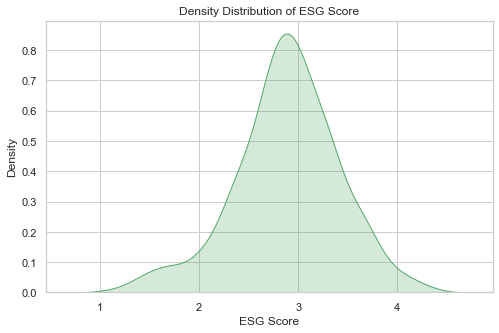

In [231]:
df_ESG = df_result[['ESG_score']].copy()
df_ESG['ESG_score'].describe()

# Plot density distribution of ESG score
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.kdeplot(df_ESG['ESG_score'], fill=True, color="g")
plt.title('Density Distribution of ESG Score')
plt.xlabel('ESG Score')
plt.ylabel('Density')
plt.show()

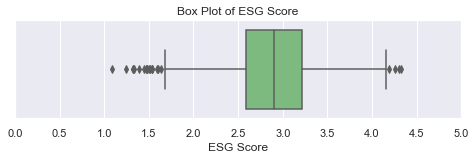

In [236]:
# Set the style of the seaborn plots
sns.set(style="darkgrid")

# Draw the box plot of ESG score
plt.figure(figsize=(8, 1.8))
sns.boxplot(x='ESG_score', data=df_ESG, palette="Greens")
plt.xticks(np.arange(0, 5.5, 0.5))
plt.title('Box Plot of ESG Score')
plt.xlabel('ESG Score')
plt.show()

In [233]:
df_ESG.describe()

,ESG_score
count,709.000000
mean,2.882480
std,0.530766
min,1.090000
25%,2.590000
50%,2.902000
75%,3.218000
max,4.330000
